In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gen=ImageDataGenerator(rotation_range=30, horizontal_flip=True, width_shift_range=0.3, shear_range=0.4)

In [3]:
img_array_list=[]
img_names = ['data/dog1.jpg', 'data/dog2.jpg', 'data/cat1.jpg', 'data/cat2.jpg']
print(img_names)

['data/dog1.jpg', 'data/dog2.jpg', 'data/cat1.jpg', 'data/cat2.jpg']


In [4]:
for i in range(len(img_names)):
    loaded_img = image.load_img(img_names[i], target_size=(100, 100))
    loaded_img_array = img_to_array(loaded_img)/255.0
    img_array_list.append(loaded_img_array)

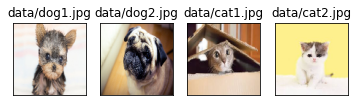

In [5]:
plt.figure(figsize=(6, 6))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [6]:
batch_size = 10
data_gen = gen.flow(np.array(img_array_list), batch_size=batch_size)

In [7]:
img = data_gen.next()

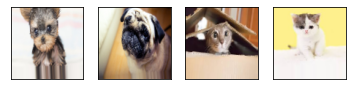

In [8]:
plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

In [9]:
gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.3, shear_range=0.3, rescale=1./255)

In [25]:
data_path = 'data/test_dir/'
batch_siz = 12

data_gen = gen.flow_from_directory(directory=data_path, batch_size=batch_siz, shuffle=True, target_size=(100, 100), class_mode='categorical')

Found 12 images belonging to 3 classes.


In [35]:
img, label = data_gen.next()

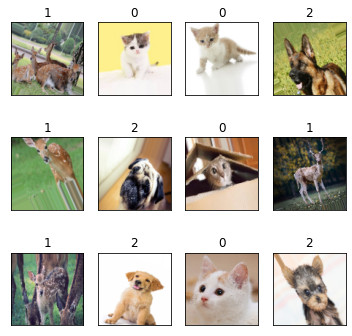

In [44]:
plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])